Statistical model:

prior: $$s \sim \text{flat}('fitnesses') $$
likelihood: $$f \sim \text{poisson}(\lambda)$$
where $$\lambda_i \sim \frac {f0_i * exp(s_i * t)} {\sum_{i} f0_i * exp(s_i * t)}$$
posterior: $$p(s \mid D,M,I) \propto p(s \mid M,I)p(D\mid M,I,s)$$

In [ ]:
import numpy as np
import pymc3 as pm
mathimport matplotlib.pyplot as plt
import seaborn as sns
from fitness_mcmc import *
import arviz as az


In [2]:
N = 10
num_gens = 49
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([7, 14, 28, 42, 49])

traj = create_trajectories(f0_vals, s_vals, times)
# The reference trajectory should be the one we know most about (have the most counts for)
# The reference trajectory should be indexed first in the data array
idx = np.flipud(np.argsort(np.sum(traj, axis = 1)))
traj = traj[idx, :]


In [3]:
fitness_model = Fitness_Model(traj)
fitness_model.find_MAP()


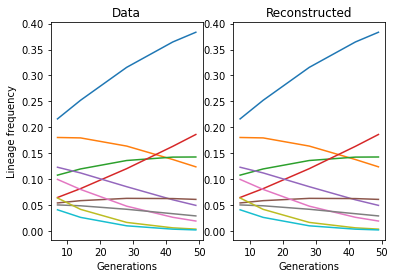

In [4]:
fitness_model.plot_MAP_estimate(type = "lin")

In [5]:
fitness_model.mcmc_sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [f0, s]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 113 seconds.
The acceptance probability does not match the target. It is 0.8800182229758139, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9822575059578091, but should be close to 0.8. Try to increase the number of tuning steps.


[-0.02260905 -0.00693741  0.01156794 -0.03536207 -0.01079421 -0.05288019
 -0.02668759 -0.0823054  -0.08539967]


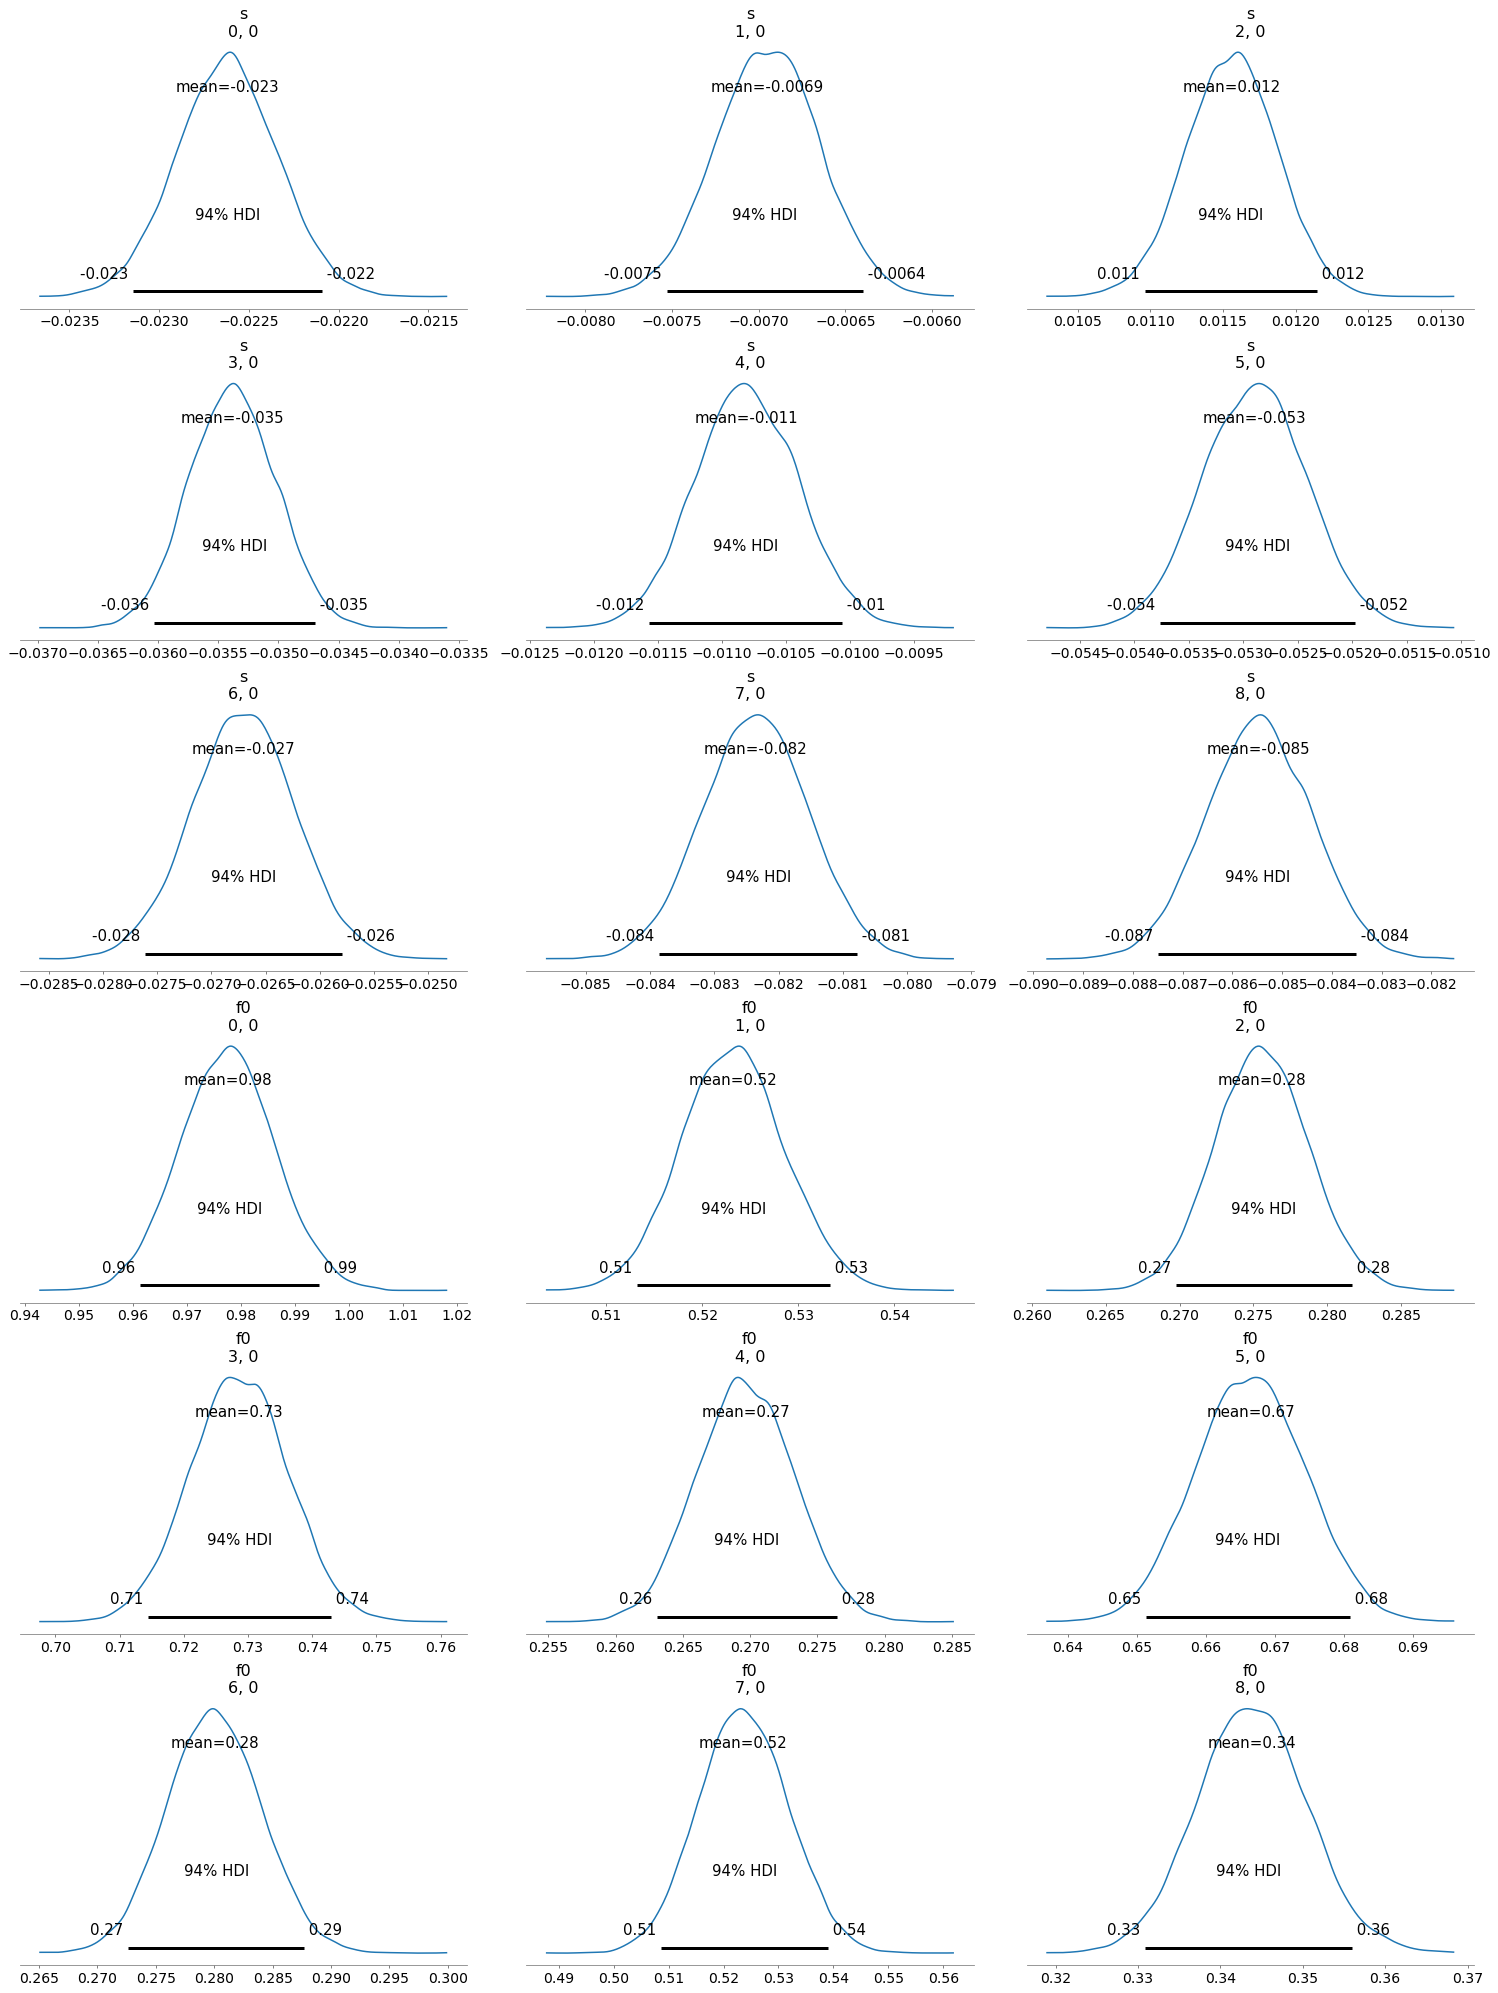

In [6]:
print(s_vals[idx[1:]] - s_vals[idx[0]])
fitness_model.plot_mcmc_posterior()
